# Multilayer Perceptrons (MLPs): The Building Blocks of Deep Learning

This notebook builds on the concepts of backpropagation introduced in the previous lesson and explores how we can use these principles to create more powerful neural network architectures called Multilayer Perceptrons (MLPs).


## 1. From Backpropagation to Neural Networks

In the previous lesson, we explored how backpropagation allows us to efficiently compute gradients in computational graphs. Now we'll see how this enables training of more complex neural networks.

Let's start by importing our required libraries:


In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Understanding the Core Components of an MLP

A multilayer perceptron (MLP) consists of three main components:

1. **Input Layer**: Takes in feature vectors
2. **Hidden Layer(s)**: Applies transformations to the inputs
3. **Output Layer**: Produces the final output values

Between each layer, we apply a non-linear activation function. This non-linearity is crucial as it allows the network to learn complex patterns.


### 2.1 Building an MLP from Scratch

Let's implement a simple MLP using the micrograd library we explored in the previous lesson. This will help us understand the inner workings.


In [2]:
from micrograd.engine import Value
from micrograd.nn import MLP

# Create a simple 2-layer MLP with 3 inputs, 4 hidden neurons, and 1 output
model = MLP(3, [4, 1])
print(model)

MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [LinearNeuron(4)]]


Let's examine how data flows through this network:


In [3]:
# Create a sample input
x = [Value(1.0), Value(2.0), Value(3.0)]

# Forward pass through the network
output = model(x)
print(f"Model output: {output}")

Model output: Value(data=0.5377108575718678, grad=0)


### 2.2 Neural Network Training Loop

The general process for training a neural network involves:

1. **Forward Pass**: Compute predictions
2. **Loss Calculation**: Measure error between predictions and targets
3. **Backward Pass**: Compute gradients using backpropagation
4. **Parameter Update**: Adjust weights using gradient descent

Let's implement a simple example to learn the XOR function:


In [4]:
# XOR data TODO: replace with tanh
X_data = [
    [0, 0],  # Input 1
    [0, 1],  # Input 2
    [1, 0],  # Input 3
    [1, 1],  # Input 4
]
y_data = [0, 1, 1, 0]  # XOR outputs

# Convert to Value objects
X = [[Value(x) for x in sample] for sample in X_data]
y = [Value(y_i) for y_i in y_data]

# Create a new MLP for XOR: 2 inputs, 3 hidden neurons, 1 output
xor_model = MLP(2, [3, 1])

# Training loop
learning_rate = 0.05
epochs = 100
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = [xor_model(x) for x in X]  # predictions
    loss = sum((y_out - y_true)**2 for y_out, y_true in zip(y_pred, y))  # MSE loss
    
    # Reset gradients
    xor_model.zero_grad()
    
    # Backward pass (compute gradients)
    loss.backward()
    
    # Update weights using gradient descent
    for p in xor_model.parameters():
        p.data -= learning_rate * p.grad
    
    # Record loss
    losses.append(loss.data)
    
    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.data:.4f}")

print(f"Final loss: {losses[-1]:.4f}")

Epoch 0, Loss: 1.3559
Epoch 10, Loss: 0.9642
Epoch 20, Loss: 0.8426
Epoch 30, Loss: 0.7478
Epoch 40, Loss: 0.6653
Epoch 50, Loss: 0.6097
Epoch 60, Loss: 0.5204
Epoch 70, Loss: 0.3888
Epoch 80, Loss: 0.2167
Epoch 90, Loss: 0.0809
Final loss: 0.0289


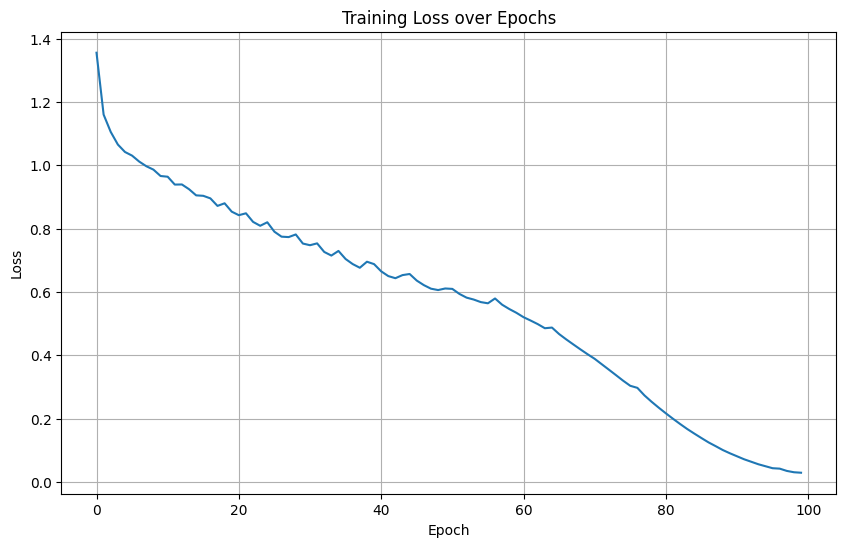

In [5]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [6]:
# Evaluate the trained model
print("XOR Truth Table Predictions:")
print("-------------------------")
print("x1 | x2 | Target | Prediction")
print("-------------------------")

for i, x in enumerate(X):
    pred = xor_model(x).data
    print(f"{X_data[i][0]}  | {X_data[i][1]}  | {y_data[i]}      | {pred:.4f}")

XOR Truth Table Predictions:
-------------------------
x1 | x2 | Target | Prediction
-------------------------
0  | 0  | 0      | 0.0736
0  | 1  | 1      | 0.8903
1  | 0  | 1      | 0.9518
1  | 1  | 0      | 0.0726


## 3. Scaling Up: MLPs in PyTorch

While micrograd is great for understanding the fundamentals, for real-world applications we'll use more optimized libraries like PyTorch. Let's implement the same XOR example using PyTorch:


In [7]:
# XOR data in PyTorch
X_tensor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_tensor = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)  # reshape for binary classification

# Define a PyTorch MLP model
class XOR_MLP(torch.nn.Module):
    def __init__(self):
        super(XOR_MLP, self).__init__()
        self.linear1 = torch.nn.Linear(2, 3)  # 2 inputs, 3 hidden units
        self.linear2 = torch.nn.Linear(3, 1)  # 3 hidden units, 1 output
        
    def forward(self, x):
        x = torch.tanh(self.linear1(x))  # Apply activation function
        x = self.linear2(x)              # Output layer (no activation for regression)
        return x

# Initialize model, loss function, and optimizer
torch_model = XOR_MLP()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.1)

# Training loop
epochs = 1000
torch_losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = torch_model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record loss
    torch_losses.append(loss.item())
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.6236
Epoch 100, Loss: 0.2072
Epoch 200, Loss: 0.1727
Epoch 300, Loss: 0.1415
Epoch 400, Loss: 0.0559
Epoch 500, Loss: 0.0030
Epoch 600, Loss: 0.0001
Epoch 700, Loss: 0.0000
Epoch 800, Loss: 0.0000
Epoch 900, Loss: 0.0000


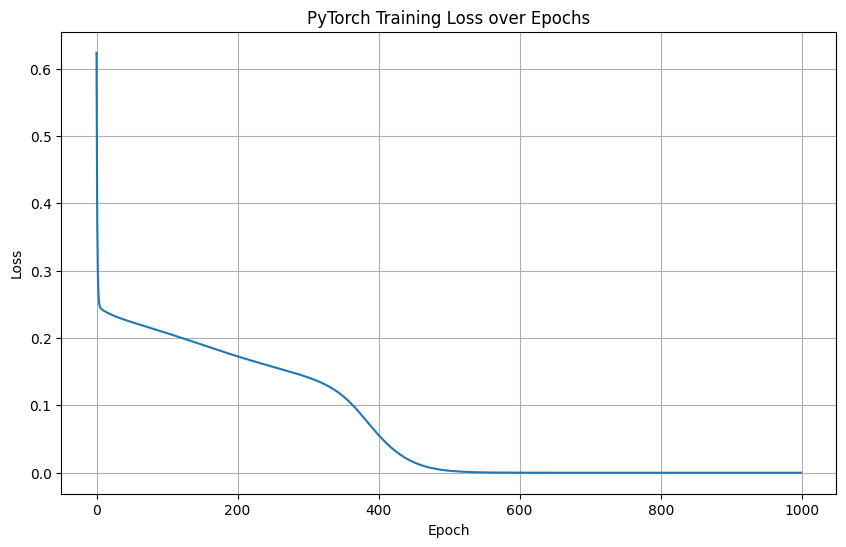

In [8]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(torch_losses)
plt.title('PyTorch Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [9]:
# Evaluate the trained PyTorch model
with torch.no_grad():  # No gradient tracking needed for evaluation
    predictions = torch_model(X_tensor)
    
print("XOR Truth Table Predictions (PyTorch):")
print("-----------------------------------")
print("x1 | x2 | Target | Prediction")
print("-----------------------------------")

for i in range(len(X_tensor)):
    x1, x2 = X_tensor[i].tolist()
    target = y_tensor[i].item()
    pred = predictions[i].item()
    print(f"{int(x1)}  | {int(x2)}  | {int(target)}      | {pred:.4f}")

XOR Truth Table Predictions (PyTorch):
-----------------------------------
x1 | x2 | Target | Prediction
-----------------------------------
0  | 0  | 0      | 0.0000
0  | 1  | 1      | 1.0000
1  | 0  | 1      | 1.0000
1  | 1  | 0      | 0.0000


## 4. A Neural Probabilistic Language Model (TODO: replace with character level language model for simplicity)

Now that we understand the basics of MLPs, let's explore a more complex application: language modeling. We'll implement a simplified version of the neural probabilistic language model introduced by Bengio et al. (2003).

The core idea of this model is to:

1. Learn distributed representations (embeddings) for words
2. Express the joint probability of word sequences using these representations
3. Learn both the embeddings and the probability function simultaneously


In [10]:
# Let's create a small vocabulary for our example
words = ['hello', 'world', 'neural', 'networks', 'learning', 'language', 'model', 'transformer', 'attention']

# Create vocabulary mappings
word_to_ix = {word: i for i, word in enumerate(words)}
ix_to_word = {i: word for i, word in enumerate(words)}

print(f"Vocabulary size: {len(words)}")
print(f"Word to index mapping: {word_to_ix}")

Vocabulary size: 9
Word to index mapping: {'hello': 0, 'world': 1, 'neural': 2, 'networks': 3, 'learning': 4, 'language': 5, 'model': 6, 'transformer': 7, 'attention': 8}


In [11]:
# Create some toy context-target pairs (context words → target word)
contexts = [
    # context words                  # target word
    ([word_to_ix['neural'], word_to_ix['networks']], word_to_ix['learning']),
    ([word_to_ix['language'], word_to_ix['model']], word_to_ix['neural']),
    ([word_to_ix['learning'], word_to_ix['language']], word_to_ix['model']),
    ([word_to_ix['hello'], word_to_ix['world']], word_to_ix['neural']),
    ([word_to_ix['neural'], word_to_ix['language']], word_to_ix['model']),
    ([word_to_ix['model'], word_to_ix['transformer']], word_to_ix['attention'])
]

# Convert to PyTorch tensors
context_idxs = torch.tensor([pair[0] for pair in contexts], dtype=torch.long)
target_idxs = torch.tensor([pair[1] for pair in contexts], dtype=torch.long)

In [12]:
# Define the Neural Language Model
class NeuralLanguageModel(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_dim):
        super(NeuralLanguageModel, self).__init__()
        self.embeddings = torch.nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = torch.nn.Linear(context_size * embedding_dim, hidden_dim)
        self.linear2 = torch.nn.Linear(hidden_dim, vocab_size)
        
    def forward(self, inputs):
        embeds = self.embeddings(inputs).view(inputs.shape[0], -1)  # Flatten the embeddings
        hidden = torch.tanh(self.linear1(embeds))                   # Hidden layer with tanh activation
        output = self.linear2(hidden)                               # Output layer (logits)
        return output

# Initialize the model
vocab_size = len(words)
embedding_dim = 10  # Dimension of word embeddings
context_size = 2    # Number of context words
hidden_dim = 16     # Hidden layer size

model = NeuralLanguageModel(vocab_size, embedding_dim, context_size, hidden_dim)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Epoch 0, Loss: 1.9815
Epoch 20, Loss: 0.5728
Epoch 40, Loss: 0.2545
Epoch 60, Loss: 0.1411
Epoch 80, Loss: 0.0896
Epoch 100, Loss: 0.0626
Epoch 120, Loss: 0.0468
Epoch 140, Loss: 0.0368
Epoch 160, Loss: 0.0300
Epoch 180, Loss: 0.0252


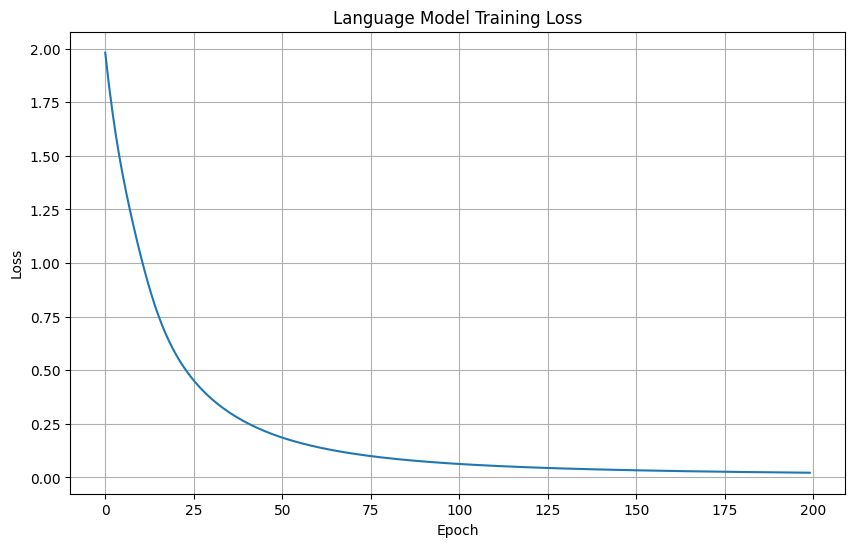

In [13]:
# Training loop
epochs = 200
losses = []

for epoch in range(epochs):
    # Forward pass
    log_probs = model(context_idxs)
    loss = loss_function(log_probs, target_idxs)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record loss
    losses.append(loss.item())
    
    # Print progress
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Language Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [14]:
# Evaluate the model
def predict_next_word(model, context_words):
    # Convert words to indices
    context_idxs = torch.tensor([word_to_ix[w] for w in context_words], dtype=torch.long).view(1, -1)
    
    # Get predictions
    with torch.no_grad():
        log_probs = model(context_idxs)
        probs = F.softmax(log_probs, dim=1)
        
    # Get top predictions
    top_probs, top_indices = probs.topk(3)
    
    results = []
    for i in range(3):
        word_idx = top_indices[0][i].item()
        prob = top_probs[0][i].item()
        results.append((ix_to_word[word_idx], prob))
        
    return results

# Try some predictions
test_contexts = [
    ['neural', 'networks'],
    ['language', 'model'],
    ['model', 'transformer']
]

for context in test_contexts:
    predictions = predict_next_word(model, context)
    print(f"Context: {' '.join(context)}")
    print(f"Predictions: {predictions}\n")

Context: neural networks
Predictions: [('learning', 0.9537138938903809), ('neural', 0.015615947544574738), ('model', 0.015585907734930515)]

Context: language model
Predictions: [('neural', 0.9876156449317932), ('learning', 0.00838580634444952), ('attention', 0.0008447664440609515)]

Context: model transformer
Predictions: [('attention', 0.9710767865180969), ('transformer', 0.0049597579054534435), ('language', 0.004581109620630741)]



## 5. Visualizing the Learned Word Embeddings

One of the key insights from Bengio's work is that the neural network learns meaningful word embeddings as a byproduct of the language modeling task. Let's visualize these embeddings:


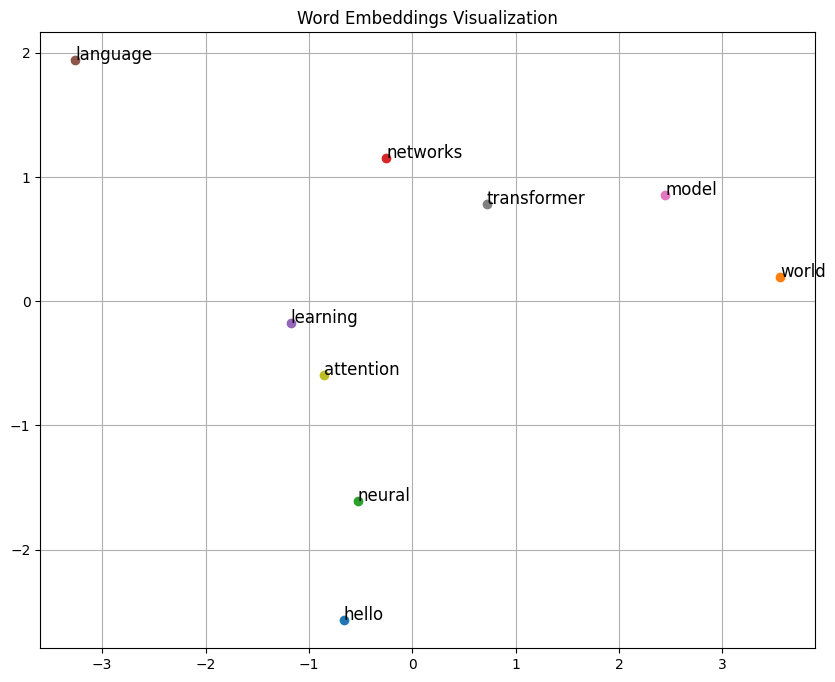

In [16]:
# Get the learned embeddings
embeddings = model.embeddings.weight.detach().numpy()

# Use PCA to reduce to 2 dimensions for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=12)
    
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()

## 6. Relationship to Transformers

This neural language model represents a foundational step toward modern transformer architectures. The key differences are:

1. **Fixed Context Window**: Our model uses a fixed number of preceding words as context.
2. **No Self-Attention**: It processes context words independently rather than attending to their relationships.
3. **Unidirectional**: It only looks at past words, not future words.

Transformers address these limitations through self-attention mechanisms, which we'll explore in upcoming lessons.


## 7. Conclusion

In this lesson, we've explored:

1. The building blocks of MLPs (layers, weights, activation functions)
2. Implementing MLPs from scratch and with PyTorch
3. Applying MLPs to solve the XOR problem
4. Creating a neural probabilistic language model in the style of Bengio's pioneering work
5. Visualizing the learned word embeddings

The neural language model we built represents a key stepping stone toward modern transformer architectures. It introduced the concept of learned word embeddings and demonstrated how a neural network can model language probabilities.
